# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [47]:
df=pd.read_excel("new_churn_data.xlsx",index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Charge_ratio
customerID,,,,,,,,
7590-VHVEG,1,1,1,3,29.85,29.85,0,1.000000
5575-GNVDE,34,0,0,0,56.95,1889.50,0,33.178227
3668-QPYBK,2,0,1,0,53.85,108.15,1,2.008357
7795-CFOCW,45,1,0,1,42.30,1840.75,0,43.516548
9237-HQITU,2,0,1,3,70.70,151.65,1,2.144979
...,...,...,...,...,...,...,...,...
6840-RESVB,24,0,0,0,84.80,1990.50,0,23.472877
2234-XADUH,72,0,0,2,103.20,7362.90,0,71.345930
4801-JZAZL,11,1,1,3,29.60,346.45,0,11.704392


In [48]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.993563044301401
0.7206132879045997


In [50]:
dt.get_depth()

29

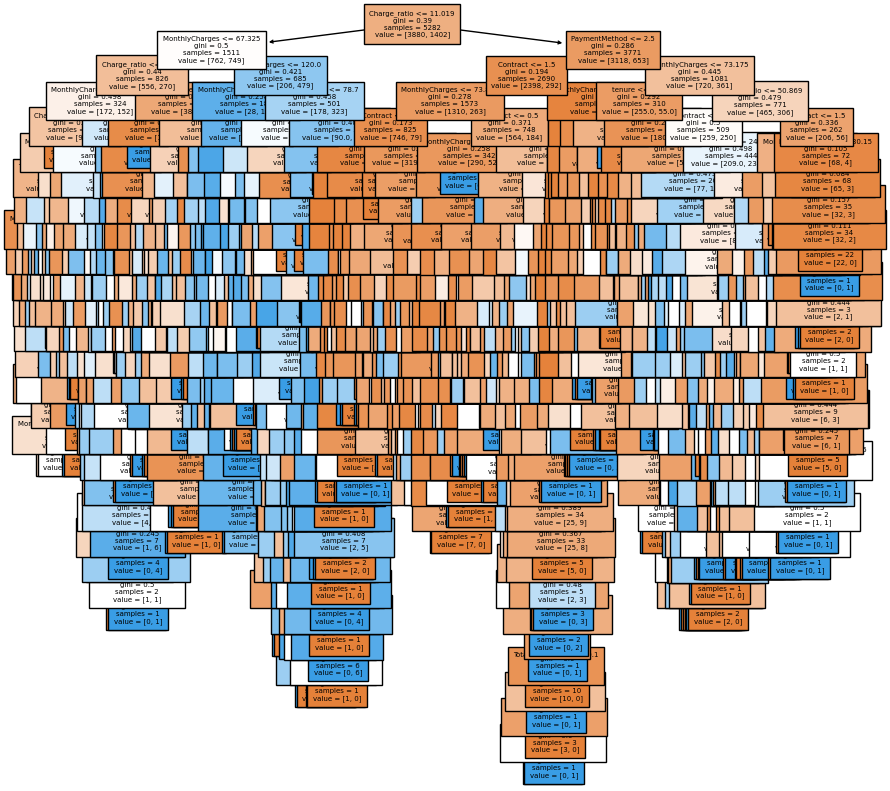

In [51]:
f = plt.figure(figsize=(10,10))
_ = plot_tree(dt, fontsize=5, feature_names=features.columns, filled=True)

In [52]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.790798939795532
0.7791027825099376


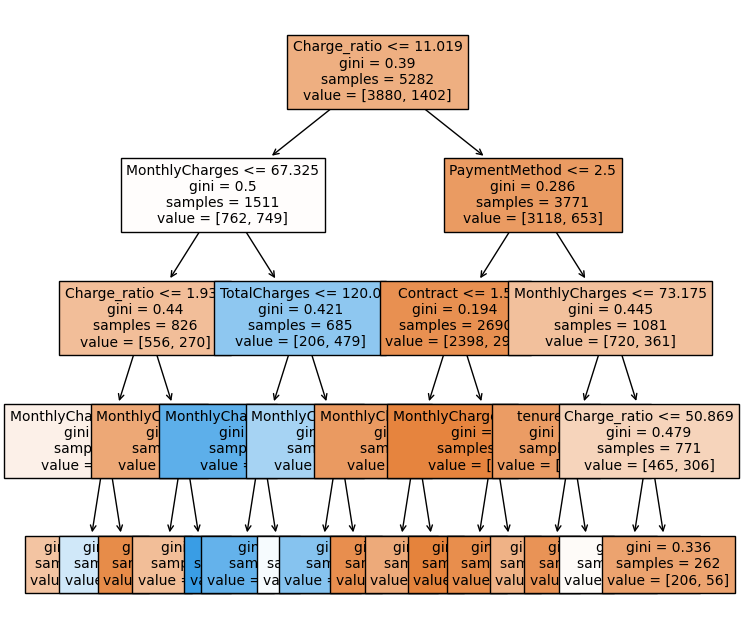

In [53]:
f = plt.figure(figsize=(8, 8))
_ = plot_tree(dt, fontsize=10, feature_names=features.columns, filled=True)

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8048087845513063
0.7915956842703009


In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=6, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8129496402877698
0.7932992617830777


In [56]:
import math

math.sqrt(x_train.shape[1])

2.6457513110645907

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, max_features=5, random_state=42)
rfc.fit(x_train, y_train)
feature_names=features.columns

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.807080651268459
0.7893242475865985


<Axes: >

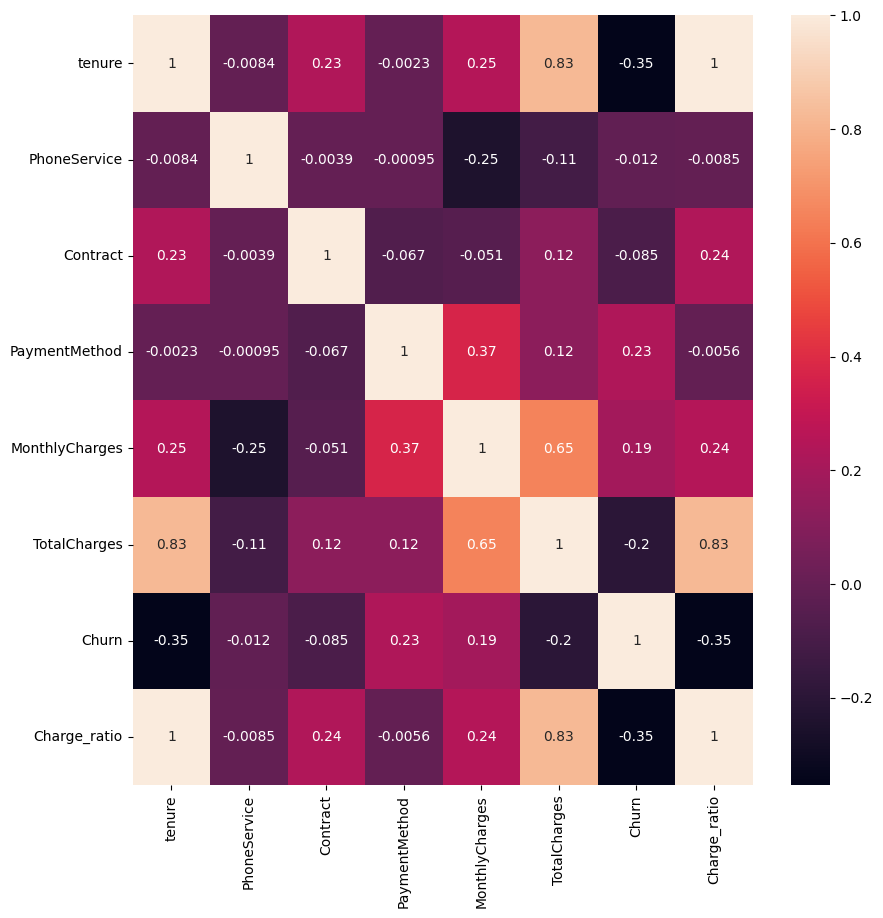

In [58]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [59]:
importances = rfc.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

          Feature  Gini Importance
6    Charge_ratio         0.334116
4  MonthlyCharges         0.283854
2        Contract         0.130023
3   PaymentMethod         0.103211
0          tenure         0.092795
5    TotalCharges         0.050603
1    PhoneService         0.005398


In [60]:
new_features = features.drop(['PhoneService', 'TotalCharges', 'PaymentMethod'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

In [61]:
rfc = RandomForestClassifier(max_depth=4, max_features=5, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.7940174176448315
0.7830777967064169


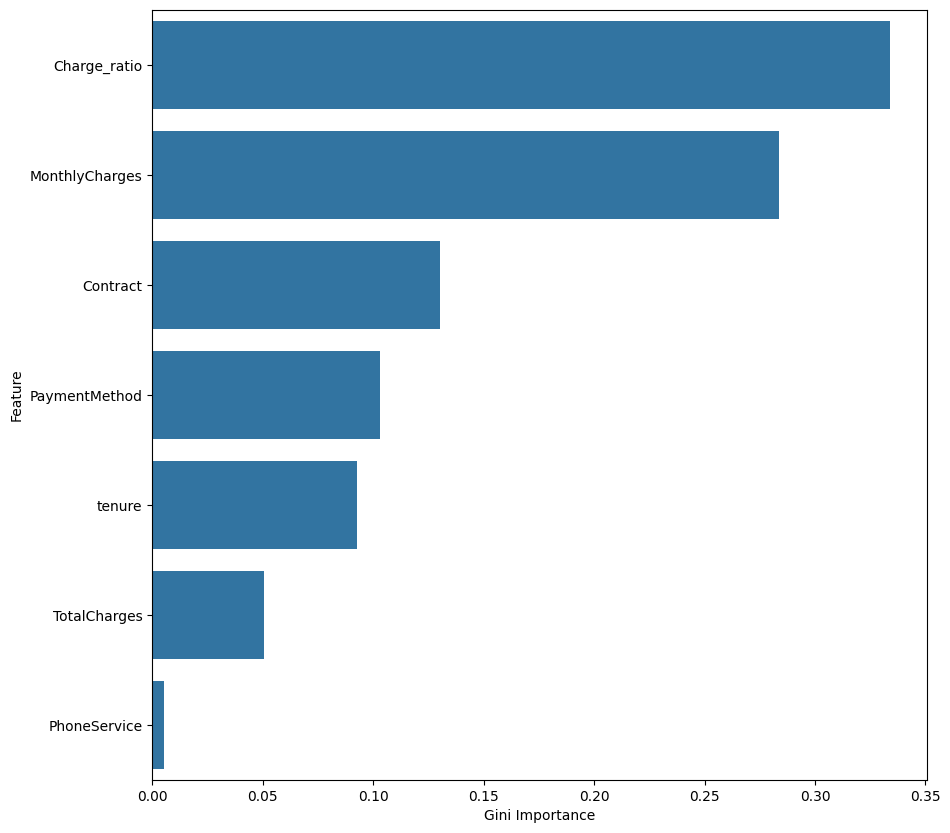

In [62]:
f = plt.figure(figsize=(10, 10))
sns.barplot(x='Gini Importance', y='Feature', data=feature_imp_df)
plt.show()

# Summary

Be sure to write a summary of your work and explain the results.

In this work I used decision tree and random forest models for churn prediction. First I split the data into train and test, then I trained a decision tree. By changing the depth of the tree, the accuracy improved and it became more balanced between training and testing. After that I looked at the correlation of features with churn and then moved to random forest model. The random forest gave better accuracy than decision tree and also showed the importance of each feature clearly.

Then I checked which features were not so important and removed them. I trained the random forest again using only the important features. The accuracy stayed almost same, but the model became easier and faster. This showed me that removing less useful features does not hurt the performance and makes the model more clear to understand.

Overall I learned that tree based models are good not only for prediction but also for feature selection. Decision tree helps to see structure and effect of depth, while random forest is more powerful and gives reliable importance values. Feature selection made the model more simple without losing accuracy, and I could also see which factors are really driving the churn in customers.